<h1>Fundamentals of AI</h1>
<h2> Exercise #6 - Running MLOps tools to track experiments<h2>

In [1]:
# show plots in notebook cells as they are created
%matplotlib inline

# set environment variable to location of local mlflow database
#%env MLFLOW_TRACKING_URI=sqlite:///mlruns.db

# if notebook complains that seaborn library is not found, uncomment the line below
#!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import ensemble, datasets, metrics, model_selection, preprocessing, pipeline
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:8885")
mlflow.set_experiment("RandomForest")

# Automatically log parameters and results from any sklearn models used
mlflow.sklearn.autolog()

2024/08/27 07:58:10 INFO mlflow.tracking.fluent: Experiment with name 'RandomForest' does not exist. Creating a new experiment.
2024/08/27 07:58:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Setup our dataset and load information into model parameters

In [2]:
# Load an existing dataset that has information on wine attributes as discussed below
wine = datasets.load_wine()

In [3]:
# Populate your x and y coordinates for your wine data
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

Stratify the data by the target label

train samples: 89
test samples 89


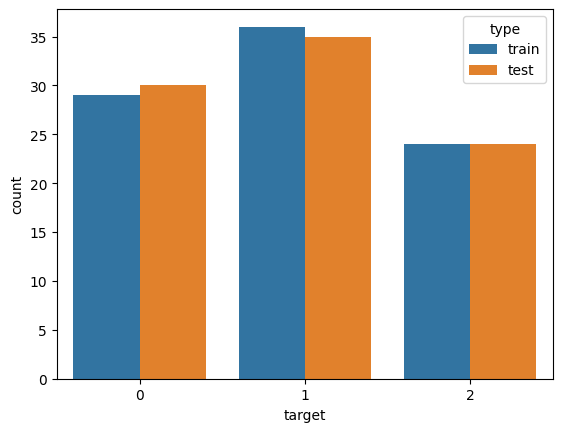

In [4]:

# train_size hyperparameter determines what percentage of the dataset is used for training vs. testing. 
# The default is .5 which means 50% of the data is used for training and 50% is used for testing.

train_size = 0.5
    
# Split the wine dataset and create inputs (x variables) & labeled outputs (y variables) for supervised training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=train_size, 
                                                                    stratify=y)

# put data in classes so it can be shown in a graph below
df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = pd.concat([df_train, df_test], ignore_index=True)

# Show training vs testing datasets by wine type
_ = sns.countplot(x='target', hue='type', data=df_set)     

# Print out number of samples for both training and testing sets. Total should equal total dataset amount
print('train samples:', len(X_train))
print('test samples', len(X_test))

In [5]:
# n_estimators hyperparameter sets how many decision trees will be used in the random forest algorithm
# as the number of decision trees increases, the accuracy should improve but computation will increase too

n_estimators = 1
#mlflow.log_param("n_estimators", n_estimators)

# max_depth hyperparameter sets the depth of each decision tree
# as the depth of your trees increase, the accuracy of the results should increase as well

max_depth = 1
#mlflow.log_param("max_depth", max_depth)

# create random forest structure based on hyperparameters
model = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

# train model on wine data by feeding it the features and telling it which class of wine is the correct one
model.fit(X_train, y_train)

2024/08/27 07:58:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd580808345784882a1a4db61e88f4815', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
C:\Users\Administrator\training-env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(max_depth=1, n_estimators=1)

In [6]:
# Test the model using the using the testing dataset we created
predicted = model.predict(X_test)

# Generate a confusion matrix across the three different types of wine to determine the models accuracy
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, predicted))

In [7]:
# Make a heat map image of the confusion matrix results
plt.figure(figsize=(6, 5))
_ = sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.savefig("confusion_matrix.png")
plt.close()  # Close the plot to avoid memory issues

In [8]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, predicted)))
print("precision: {:.3f}".format(metrics.precision_score(y_test, predicted, average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(y_test, predicted, average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(y_test, predicted, average='weighted')))

accuracy: 0.640
precision: 0.491
recall: 0.640
f1 score: 0.551


C:\Users\Administrator\training-env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
